In [1]:
import numpy
import pandas as pd
import csv
import matplotlib.pyplot as plt
import os

In [2]:
folder_bench='results-'
folder_cass='results-cassandra'
experiment_date='2019-09-27T162729'
files = []

In [3]:
folder=folder_bench+experiment_date
with os.scandir(folder) as it:
    for file in it:
        if file.name.endswith('.csv') & file.is_file():
            files.append(folder+'/'+file.name)

In [4]:
files
data = pd.concat([pd.read_csv(f) for f in files])
traces = pd.read_csv(folder_cass+'/'+'traces.csv')

In [5]:
dft = pd.DataFrame(traces)
df = pd.DataFrame(data)
df['SpanDuration'] = df.FinishTime - df.StartTime
df.head(10)

,Service,TraceNumber,SpanNumber,StartTime,FinishTime,Sampled,SpanDuration
0,svc02,0,-1,1569594449456356970,1569594449476522392,False,20165422
1,svc02,1,-1,1569594449556127594,1569594449576292067,False,20164473
2,svc02,2,-1,1569594449653560515,1569594449673700448,False,20139933
3,svc02,3,-1,1569594449753166382,1569594449773458893,False,20292511
4,svc02,4,-1,1569594449853117775,1569594449873277088,False,20159313
5,svc02,5,-1,1569594449952899051,1569594449973168433,False,20269382
6,svc02,6,-1,1569594450053084732,1569594450073187586,False,20102854
7,svc02,7,-1,1569594450152937927,1569594450173358017,False,20420090
8,svc02,8,-1,1569594450253264597,1569594450273457770,True,20193173
9,svc02,9,-1,1569594450352828075,1569594450372990928,False,20162853


In [6]:
df_transformed = df.copy()
df_transformed.StartTime = df.StartTime / 1000.0
df_transformed.FinishTime = df.FinishTime / 1000.0
df_transformed = df_transformed.astype({'StartTime': 'int64', 'FinishTime': 'int64'})
#Filter non-sampled span data
df_transformed = df_transformed.loc[df_transformed['Sampled']]
df_transformed = df_transformed.sort_values(by = 'StartTime')
df_transformed.reset_index(drop=True, inplace=True)
dft_sorted = dft.sort_values(by = 'start_time')
dft_sorted.reset_index(drop=True, inplace=True)

In [7]:
if len(dft_sorted) != len(df_transformed):
    print("Length of datasets is different!!")

In [13]:
df = dft_sorted.join(df_transformed)
df.head(10)

,trace_id,span_id,span_hash,duration,flags,logs,operation_name,parent_id,process,refs,start_time,tags,write_time,Service,TraceNumber,SpanNumber,StartTime,FinishTime,Sampled,SpanDuration
0,0x0000000000000000001830b720a757f4,6808962526042100,-3834415826564509348,61712,1,"[{ts: 1569594450232346, fields: [{key: 'event'...",svc01-parent,0,"{service_name: 'svc01', tags: [{key: 'jaeger.v...",NaN,1569594450232307,"[{key: 'sampler.type', value_type: 'string', v...",1569594450337874,svc01,8,-1,1569594450232304,1569594450294025,True,61721386
1,0x0000000000000000001830b720a757f4,5456295298301401243,-5727575812644561086,41406,1,NaN,svc01-call-0,0,"{service_name: 'svc01', tags: [{key: 'jaeger.v...","[{ref_type: 'child-of', trace_id: 0x0000000000...",1569594450232361,"[{key: 'internal.span.format', value_type: 'st...",1569594450337840,svc01,8,0,1569594450232360,1569594450273771,True,41411165
2,0x0000000000000000001830b720a757f4,405742302895098115,-1057588960692949119,20185,1,NaN,svc02-parent,0,"{service_name: 'svc02', tags: [{key: 'jaeger.v...","[{ref_type: 'child-of', trace_id: 0x0000000000...",1569594450253267,"[{key: 'zjtvf1EL1kMatm03SF8Z', value_type: 'st...",1569594450337792,svc02,8,-1,1569594450253264,1569594450273457,True,20193173
3,0x00000000000000000c2ad1402a41b4fb,876743150994044155,4207397932815183289,61040,1,"[{ts: 1569594450632315, fields: [{key: 'event'...",svc01-parent,0,"{service_name: 'svc01', tags: [{key: 'jaeger.v...",NaN,1569594450632302,"[{key: 'sampler.type', value_type: 'string', v...",1569594451334746,svc01,12,-1,1569594450632299,1569594450693345,True,61045853
4,0x00000000000000000c2ad1402a41b4fb,7077502486474486124,-3614757675212078037,40792,1,NaN,svc01-call-0,0,"{service_name: 'svc01', tags: [{key: 'jaeger.v...","[{ref_type: 'child-of', trace_id: 0x0000000000...",1569594450632326,"[{key: 'internal.span.format', value_type: 'st...",1569594451334727,svc01,12,0,1569594450632324,1569594450673121,True,40796421
5,0x00000000000000000c2ad1402a41b4fb,8787506870518801896,-5377128355050493311,20110,1,NaN,svc02-parent,0,"{service_name: 'svc02', tags: [{key: 'jaeger.v...","[{ref_type: 'child-of', trace_id: 0x0000000000...",1569594450652831,"[{key: 'zjtvf1EL1kMatm03SF8Z', value_type: 'st...",1569594451331408,svc02,12,-1,1569594450652828,1569594450672947,True,20118653
6,0x000000000000000008577eec88843609,601088629644998153,7095554667069968827,61009,1,"[{ts: 1569594450832313, fields: [{key: 'event'...",svc01-parent,0,"{service_name: 'svc01', tags: [{key: 'jaeger.v...",NaN,1569594450832297,"[{key: 'sampler.type', value_type: 'string', v...",1569594451334746,svc01,14,-1,1569594450832294,1569594450893308,True,61014094
7,0x000000000000000008577eec88843609,7801993825639795872,-6569321302979388140,40884,1,NaN,svc01-call-0,0,"{service_name: 'svc01', tags: [{key: 'jaeger.v...","[{ref_type: 'child-of', trace_id: 0x0000000000...",1569594450832338,"[{key: 'internal.span.format', value_type: 'st...",1569594451334702,svc01,14,0,1569594450832322,1569594450873225,True,40902600
8,0x000000000000000008577eec88843609,738420151828545577,-501570273850953065,20103,1,NaN,svc02-parent,0,"{service_name: 'svc02', tags: [{key: 'jaeger.v...","[{ref_type: 'child-of', trace_id: 0x0000000000...",1569594450852857,"[{key: 'zjtvf1EL1kMatm03SF8Z', value_type: 'st...",1569594451331403,svc02,14,-1,1569594450852854,1569594450872966,True,20112033
9,0x0000000000000000086e8524711b02cb,607569391304508107,-6217066105197197516,61355,1,"[{ts: 1569594451632371, fields: [{key: 'event'...",svc01-parent,0,"{service_name: 'svc01', tags: [{key: 'jaeger.v...",NaN,1569594451632355,"[{key: 'sampler.type', value_type: 'string', v...",1569594452331669,svc01,22,-1,1569594451632349,1569594451693715,True,61365630


## Assumptions for Calculations
Assumptions necessary for calculation of trace completion times, i.e. the point in time a all Spans of a trace have been written to a database.
1. All Traces are completed, i.e. all Spans part of a Trace are in the dataset
1. All Spans are sorted by their StartTime in ascending order
    * Monotonic increasing timestamps can only be assumed safely while there are no "parallel" paths in a trace
    * Also, work time distributions other than static ones will inevitably disperse spans across the dataset
1. There is one operation/service, that is consistently the 'last' one to be invoked and also the last one in the dataset
    * This operation serves as a marker for the last Span in a trace
    * Probably the first assumption that has to be revoked -> we need to to "count" spans part of a trace as an alternative to static iteration

In [9]:
df['span_visibility'] = df.write_time - df.StartTime
starttime = 0
completion_times = []
write_times_tmp = []
for index, row in df.iterrows():
    #save the write time of current span in temp list
    write_times_tmp.append(row['write_time'])
    if row['operation_name'] == 'svc01-parent':
        #if the operation name is the root operation, we can assume this is the first time a trace has been seen,
        #so use this start time for the trace
        starttime = row['StartTime']
    if row['operation_name'] == 'svc02-parent':
        #svc02-parent is the "last" span in the deployment, so we can safely assume for this trace no more spans(=rows)
        #follow because they are sorted by time in monotonically increasing order
        #take the maximum (i.e. latest) of write times and subtract the starttime to get trace completion time
        #TODO: can we use a generic approach to identify the "last" span in the list of all created spans?
        #TODO: it would make more sense to have the trace completion time at the root span (or at all spans?)
        completion_times.append(max(write_times_tmp) - starttime)
        write_times_tmp = []
    else:
        #for all rows that are not the last span of a trace, add a zero,
        #so we can easily add the list to the pandas dataframe
        completion_times.append(0)

[0,
 0,
 105570,
 0,
 0,
 702447,
 0,
 0,
 502452,
 0,
 0,
 699320,
 0,
 0,
 699063,
 0,
 0,
 198529,
 0,
 0,
 598940,
 0,
 0,
 399228,
 0,
 0,
 99210,
 0,
 0,
 499004,
 0,
 0,
 999920,
 0,
 0,
 399967,
 0,
 0,
 699101,
 0,
 0,
 600387,
 0,
 0,
 499960,
 0,
 0,
 300101,
 0,
 0,
 999279,
 0,
 0,
 799103,
 0,
 0,
 698509,
 0,
 0,
 799050,
 0,
 0,
 399034,
 0,
 0,
 899476,
 0,
 0,
 99055,
 0,
 0,
 798953,
 0,
 0,
 898944,
 0,
 0,
 399007,
 0,
 0,
 499129,
 0,
 0,
 398628,
 0,
 0,
 899056,
 0,
 0,
 398638,
 0,
 0,
 999038,
 0,
 0,
 298942,
 0,
 0,
 799005,
 0,
 0,
 899092,
 0,
 0,
 798831,
 0,
 0,
 699275,
 0,
 0,
 599649,
 0,
 0,
 898860,
 0,
 0,
 798974,
 0,
 0,
 598946,
 0,
 0,
 698629,
 0,
 0,
 398466,
 0,
 0,
 199011,
 0,
 0,
 999195,
 0,
 0,
 698905,
 0,
 0,
 298522,
 0,
 0,
 999292,
 0,
 0,
 199280,
 0,
 0,
 699192,
 0,
 0,
 299321,
 0,
 0,
 799047,
 0,
 0,
 399162,
 0,
 0,
 802741,
 0,
 0,
 899099,
 0,
 0,
 799488,
 0,
 0,
 599393,
 0,
 0,
 299282,
 0,
 0,
 898726,
 0,
 0,
 499014,

In [31]:
for i in range(0,len(completion_times)):
    if completion_times[i] == 0:
        completion_times[i] = completion_times[i+1]
for i in range(0,len(completion_times)):
    if completion_times[i] == 0:
        completion_times[i] = completion_times[i+1]
df['completion_time'] = completion_times

In [32]:
df.head(6)

,trace_id,span_id,span_hash,duration,flags,logs,operation_name,parent_id,process,refs,...,tags,write_time,Service,TraceNumber,SpanNumber,StartTime,FinishTime,Sampled,SpanDuration,completion_time
0,0x0000000000000000001830b720a757f4,6808962526042100,-3834415826564509348,61712,1,"[{ts: 1569594450232346, fields: [{key: 'event'...",svc01-parent,0,"{service_name: 'svc01', tags: [{key: 'jaeger.v...",NaN,...,"[{key: 'sampler.type', value_type: 'string', v...",1569594450337874,svc01,8,-1,1569594450232304,1569594450294025,True,61,105570
1,0x0000000000000000001830b720a757f4,5456295298301401243,-5727575812644561086,41406,1,NaN,svc01-call-0,0,"{service_name: 'svc01', tags: [{key: 'jaeger.v...","[{ref_type: 'child-of', trace_id: 0x0000000000...",...,"[{key: 'internal.span.format', value_type: 'st...",1569594450337840,svc01,8,0,1569594450232360,1569594450273771,True,41,105570
2,0x0000000000000000001830b720a757f4,405742302895098115,-1057588960692949119,20185,1,NaN,svc02-parent,0,"{service_name: 'svc02', tags: [{key: 'jaeger.v...","[{ref_type: 'child-of', trace_id: 0x0000000000...",...,"[{key: 'zjtvf1EL1kMatm03SF8Z', value_type: 'st...",1569594450337792,svc02,8,-1,1569594450253264,1569594450273457,True,20,105570
3,0x00000000000000000c2ad1402a41b4fb,876743150994044155,4207397932815183289,61040,1,"[{ts: 1569594450632315, fields: [{key: 'event'...",svc01-parent,0,"{service_name: 'svc01', tags: [{key: 'jaeger.v...",NaN,...,"[{key: 'sampler.type', value_type: 'string', v...",1569594451334746,svc01,12,-1,1569594450632299,1569594450693345,True,61,702447
4,0x00000000000000000c2ad1402a41b4fb,7077502486474486124,-3614757675212078037,40792,1,NaN,svc01-call-0,0,"{service_name: 'svc01', tags: [{key: 'jaeger.v...","[{ref_type: 'child-of', trace_id: 0x0000000000...",...,"[{key: 'internal.span.format', value_type: 'st...",1569594451334727,svc01,12,0,1569594450632324,1569594450673121,True,40,702447
5,0x00000000000000000c2ad1402a41b4fb,8787506870518801896,-5377128355050493311,20110,1,NaN,svc02-parent,0,"{service_name: 'svc02', tags: [{key: 'jaeger.v...","[{ref_type: 'child-of', trace_id: 0x0000000000...",...,"[{key: 'zjtvf1EL1kMatm03SF8Z', value_type: 'st...",1569594451331408,svc02,12,-1,1569594450652828,1569594450672947,True,20,702447


In [19]:
df['SpanDuration'] = df['SpanDuration'] / 1000

In [33]:
df = df.astype({'SpanDuration': 'int64'})
df.head(6)

,trace_id,span_id,span_hash,duration,flags,logs,operation_name,parent_id,process,refs,...,tags,write_time,Service,TraceNumber,SpanNumber,StartTime,FinishTime,Sampled,SpanDuration,completion_time
0,0x0000000000000000001830b720a757f4,6808962526042100,-3834415826564509348,61712,1,"[{ts: 1569594450232346, fields: [{key: 'event'...",svc01-parent,0,"{service_name: 'svc01', tags: [{key: 'jaeger.v...",NaN,...,"[{key: 'sampler.type', value_type: 'string', v...",1569594450337874,svc01,8,-1,1569594450232304,1569594450294025,True,61,105570
1,0x0000000000000000001830b720a757f4,5456295298301401243,-5727575812644561086,41406,1,NaN,svc01-call-0,0,"{service_name: 'svc01', tags: [{key: 'jaeger.v...","[{ref_type: 'child-of', trace_id: 0x0000000000...",...,"[{key: 'internal.span.format', value_type: 'st...",1569594450337840,svc01,8,0,1569594450232360,1569594450273771,True,41,105570
2,0x0000000000000000001830b720a757f4,405742302895098115,-1057588960692949119,20185,1,NaN,svc02-parent,0,"{service_name: 'svc02', tags: [{key: 'jaeger.v...","[{ref_type: 'child-of', trace_id: 0x0000000000...",...,"[{key: 'zjtvf1EL1kMatm03SF8Z', value_type: 'st...",1569594450337792,svc02,8,-1,1569594450253264,1569594450273457,True,20,105570
3,0x00000000000000000c2ad1402a41b4fb,876743150994044155,4207397932815183289,61040,1,"[{ts: 1569594450632315, fields: [{key: 'event'...",svc01-parent,0,"{service_name: 'svc01', tags: [{key: 'jaeger.v...",NaN,...,"[{key: 'sampler.type', value_type: 'string', v...",1569594451334746,svc01,12,-1,1569594450632299,1569594450693345,True,61,702447
4,0x00000000000000000c2ad1402a41b4fb,7077502486474486124,-3614757675212078037,40792,1,NaN,svc01-call-0,0,"{service_name: 'svc01', tags: [{key: 'jaeger.v...","[{ref_type: 'child-of', trace_id: 0x0000000000...",...,"[{key: 'internal.span.format', value_type: 'st...",1569594451334727,svc01,12,0,1569594450632324,1569594450673121,True,40,702447
5,0x00000000000000000c2ad1402a41b4fb,8787506870518801896,-5377128355050493311,20110,1,NaN,svc02-parent,0,"{service_name: 'svc02', tags: [{key: 'jaeger.v...","[{ref_type: 'child-of', trace_id: 0x0000000000...",...,"[{key: 'zjtvf1EL1kMatm03SF8Z', value_type: 'st...",1569594451331408,svc02,12,-1,1569594450652828,1569594450672947,True,20,702447


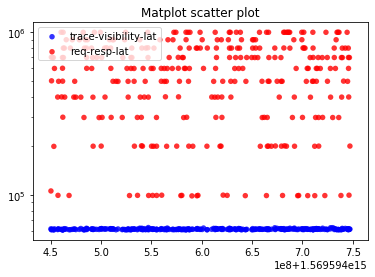

In [40]:
df_roots = df.loc[df['operation_name'] == 'svc01-parent']
colors = {'red', 'blue'}
categories = {'req-resp-lat', 'trace-visibility-lat'}
columns = {'duration', 'completion_time'}
scatterplot = plt.figure()
ax = scatterplot.add_subplot(1, 1, 1)
for column, color, cat in zip(columns, colors, categories):
    x, y = df_roots['StartTime'], df_roots[column]
    ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=cat)
plt.title('Matplot scatter plot')
plt.yscale("log")
plt.legend(loc=2)
plt.show()

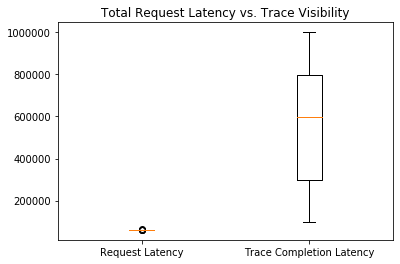

In [43]:
plt.title('Total Request Latency vs. Trace Visibility')
plot = plt.boxplot([df_roots['duration'], df_roots['completion_time']], labels=['Request Latency','Trace Completion Latency'])